#Installing Dependencies

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install xgboost
!pip install pickle
!pip install scipy
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


# EDA

In [ ]:
import math
import csv
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBRegressor
from scipy import stats,special
from sklearn.svm import SVR
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# There are 81 columns: 79 Features + Id + SalePrice
dataset = pd.read_csv("train.csv")
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Separating numerical and categorical data
numerical_features = dataset.dtypes[dataset.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = dataset.dtypes[dataset.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  38
Number of Categorical features:  43


In [ ]:
print(dataset[numerical_features].columns)
print("*"*100)
print(dataset[categorical_features].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

In [ ]:
# List of features with missing values
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [ ]:
# There are 19 features having missing values 
# 16 Categorical
# 3 Numerical
categorical_null = []
numerical_null = []
for index,row in missing_data.iterrows():
    if row['Total'] != 0:
        if index in categorical_features:
            categorical_null.append(index)
        else:
            numerical_null.append(index)

In [ ]:
print(categorical_null)
print("*"*100)
print(numerical_null)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
****************************************************************************************************
['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


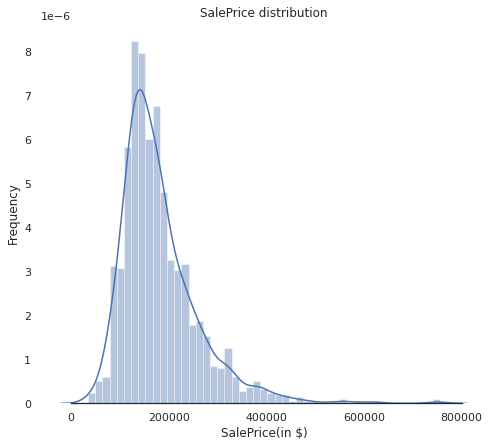

In [ ]:
# Sales price is not a normal distribution
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(dataset['SalePrice']);
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice(in $)")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

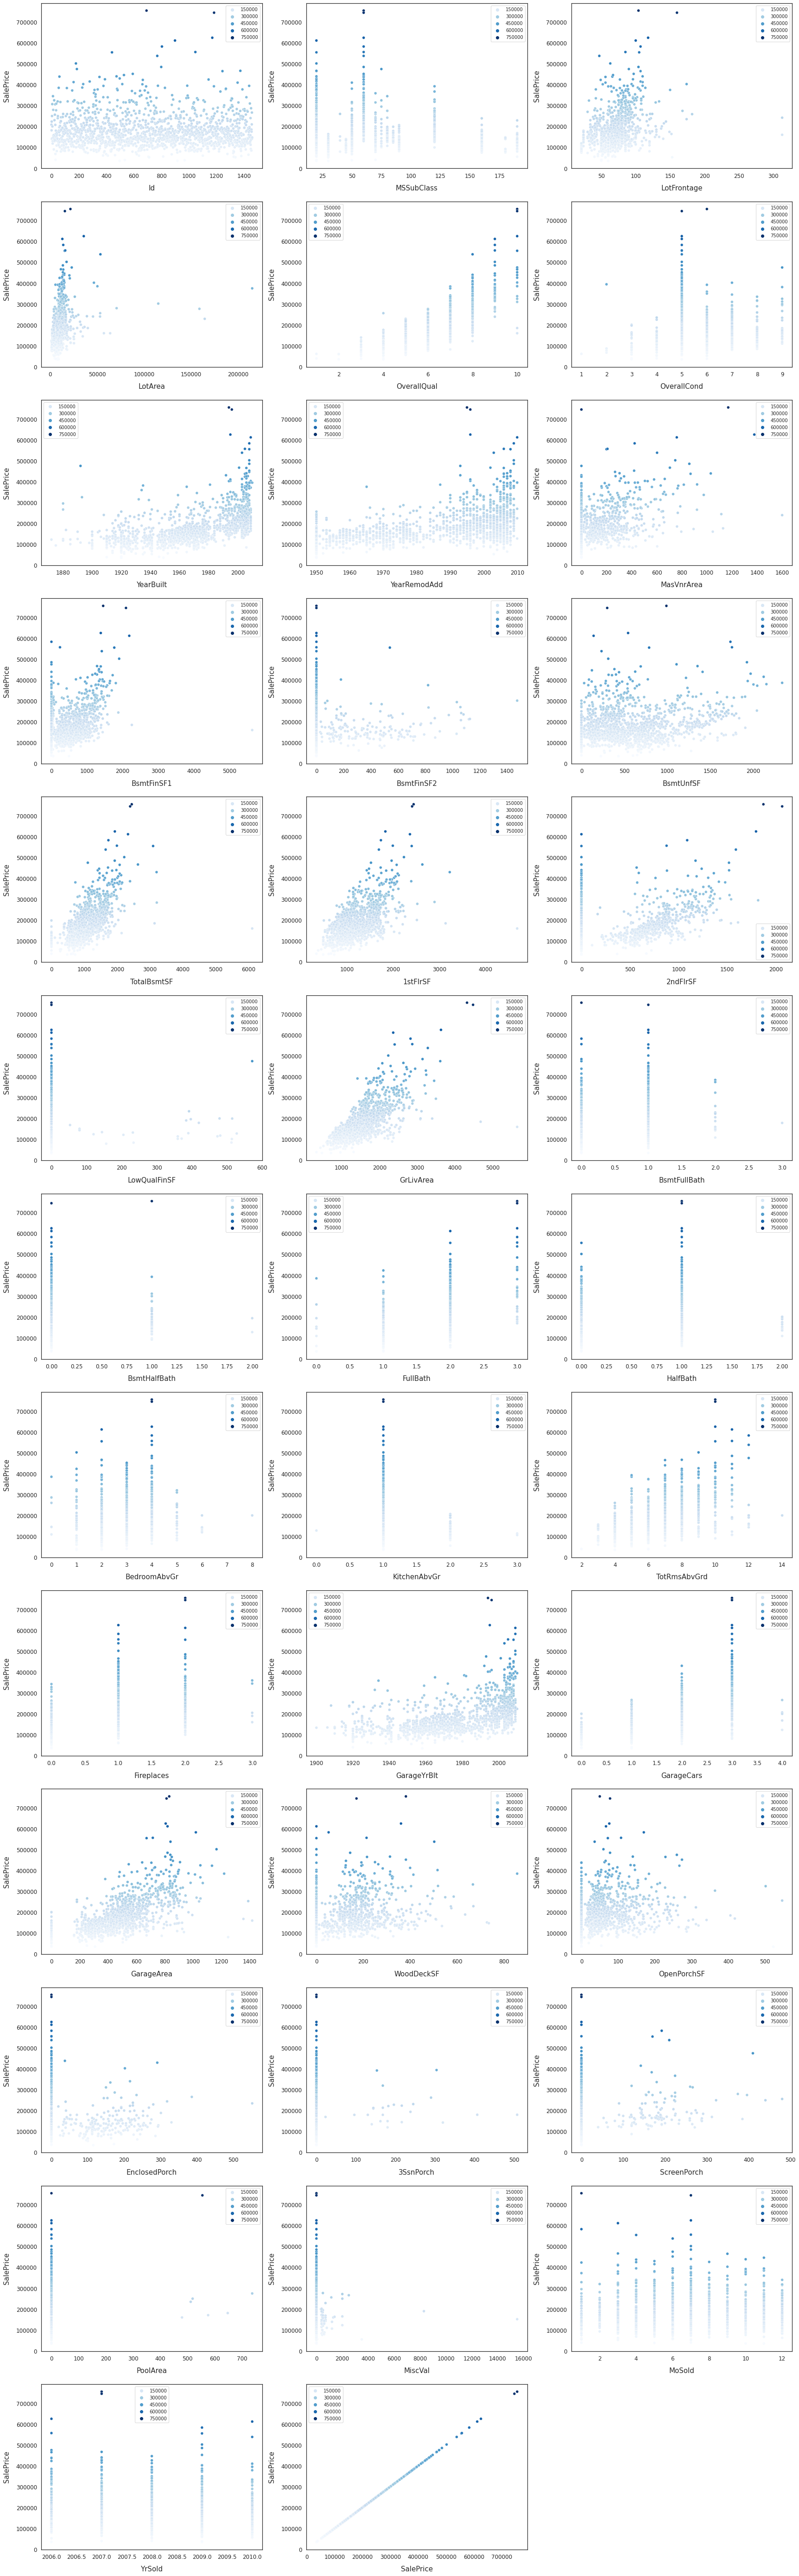

In [ ]:
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, feature in enumerate(list(dataset[numerical_features]), 1):
    plt.subplot(len(list(numerical_features)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=dataset)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [ ]:
# Categorical data and their unique value counts
for catg in list(categorical_features) :
    print(dataset[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

# Feature Engineering

In [ ]:
# Loading the both test and train set

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Removing ID since it is unique for each datapoint
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [ ]:
# Remove outliers
cols = [feature for feature in numerical_features if feature != 'Id' and feature != 'SalePrice']
Q1 = train[cols].quantile(0.01)
Q99 = train[cols].quantile(0.99)
train = train[~((train[cols] < (Q1)) |(train[cols] > (Q99))).any(axis=1)]

# Replace with median

train.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


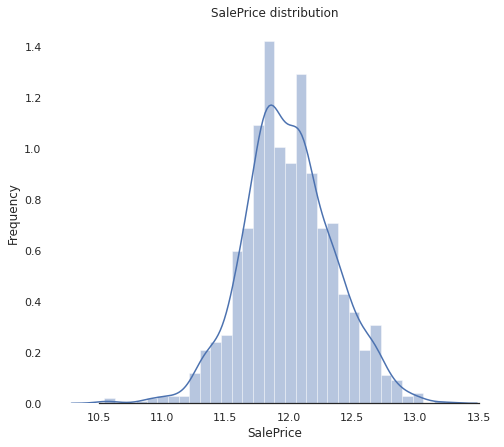

In [ ]:
# Normalising the dependent variable
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice']);
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2655, 79)

### Dealing with Missing Values

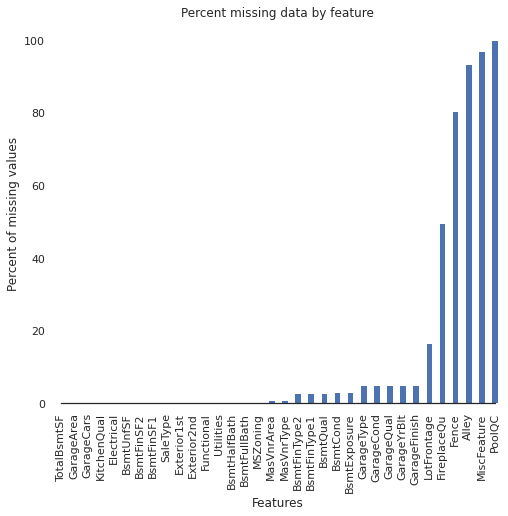

In [ ]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(all_features.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

Check for missing attributes

In [ ]:
all_features['Functional'] = all_features['Functional'].fillna('Typ')
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")
all_features['KitchenQual'] = all_features['KitchenQual'].fillna("TA")

# Replace the missing values in each of the columns below with their mode
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0])
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])
all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# the data description stats that NA refers to "No Pool"
all_features["PoolQC"] = all_features["PoolQC"].fillna("NA")
# Replacing the missing values with 0, since no garage = no cars in garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_features[col] = all_features[col].fillna(0)                              # Check for GarageYrBlt
# Replacing the missing values with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_features[col] = all_features[col].fillna('None')
# NaN values for these categorical basement features, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_features[col] = all_features[col].fillna('None')
# Replacing Nan value for SaleType as Other
all_features['SaleType'] = all_features['SaleType'].fillna('Oth')
all_features['FireplaceQu'] = all_features['FireplaceQu'].fillna('NA')
all_features['Fence'] = all_features['Fence'].fillna('NA')
all_features['Alley'] = all_features['Alley'].fillna('NA')
all_features['MiscFeature'] = all_features['MiscFeature'].fillna('NA')

# Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# We have no particular intuition around how to fill in the rest of the categorical features
# So we replace their missing values with None
objects = []
for i in all_features.columns:
    if all_features[i].dtype == object:
        objects.append(i)
all_features.update(all_features[objects].fillna('None'))
    
# And we do the same thing for numerical features, but this time with 0s
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)
all_features.update(all_features[numeric].fillna(0))   

In [ ]:
# Check if all the missing values have been dealt with or not
data = pd.DataFrame(all_features)
df_cols = list(pd.DataFrame(data))
dict_x = {}
for i in range(0, len(df_cols)):
    dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
df_miss = sorted(dict_x.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFul

In [ ]:
# for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
#     all_features[feature] = all_features['YrSold'] - all_features[feature]
#     all_features[feature < 0] = 0

In [ ]:
# Find skewed numerical features
skew_features = all_features[[feature for feature in numerical_features if feature != 'Id' and feature != 'SalePrice']].apply(lambda x: stats.skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(26)

There are 26 numerical features with Skew > 0.5 :


PoolArea         27.261089
MiscVal          26.625768
LowQualFinSF     18.728869
3SsnPorch        12.851130
KitchenAbvGr      4.545845
BsmtFinSF2        4.210204
EnclosedPorch     4.195566
ScreenPorch       3.905371
BsmtHalfBath      3.855927
LotArea           2.749567
MasVnrArea        2.394402
OpenPorchSF       2.391159
WoodDeckSF        1.792356
MSSubClass        1.382342
1stFlrSF          1.320169
GrLivArea         0.969188
BsmtFinSF1        0.960374
BsmtUnfSF         0.870165
2ndFlrSF          0.838155
Fireplaces        0.713200
TotRmsAbvGrd      0.689658
HalfBath          0.659762
OverallCond       0.632014
TotalBsmtSF       0.574335
BsmtFullBath      0.574119
LotFrontage       0.502565
dtype: float64

In [ ]:
# We need a normal distribution since sklean library assumes the data to have a normal distribution and
# does not perform well otherwise. Here we are trying to get a transformation which will give us a normal distribution.
# For this we are using box - cox transform of 1 + x
# y = ((1+x)**lmbda - 1) / lmbda  if lmbda != 0
#     log(1+x)                    if lmbda == 0
# lmbda is calculated using boxcox_normmax

for i in skew_index:
    all_features[i] = special.boxcox1p(all_features[i], stats.boxcox_normmax(all_features[i] + 1))

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
num_features = all_features.dtypes[all_features.dtypes != "object"].index
for col in num_features:
    skew = all_features[col].skew()
    print('{:15}'.format(col), '{:05.2f}'.format(skew))

MSSubClass      00.45
LotFrontage     00.08
LotArea         00.00
OverallQual     00.21
OverallCond     00.42
YearBuilt       -0.56
YearRemodAdd    -0.44
MasVnrArea      00.97
BsmtFinSF1      00.37
BsmtFinSF2      02.65
BsmtUnfSF       00.04
TotalBsmtSF     00.29
1stFlrSF        -0.01
2ndFlrSF        00.91
LowQualFinSF    10.54
GrLivArea       00.00
BsmtFullBath    00.60
BsmtHalfBath    03.78
FullBath        00.18
HalfBath        00.70
BedroomAbvGr    00.27
KitchenAbvGr    04.19
TotRmsAbvGrd    00.05
Fireplaces      00.56
GarageYrBlt     -4.18
GarageCars      -0.22
GarageArea      00.18
WoodDeckSF      00.79
OpenPorchSF     00.61
EnclosedPorch   02.17
3SsnPorch       10.50
ScreenPorch     03.22
PoolArea        21.10
MiscVal         05.69
MoSold          00.20
YrSold          00.14


In [ ]:
# One hot encoding ccategorical data because the models can only work with numerical data

# Label encode for random forest
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(2655, 295)

In [ ]:
# Remove any duplicated column names
all_features = all_features.loc[:,~all_features.columns.duplicated()]
all_features.shape

(2655, 295)

In [ ]:
# Split to test & train data
X_train = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]

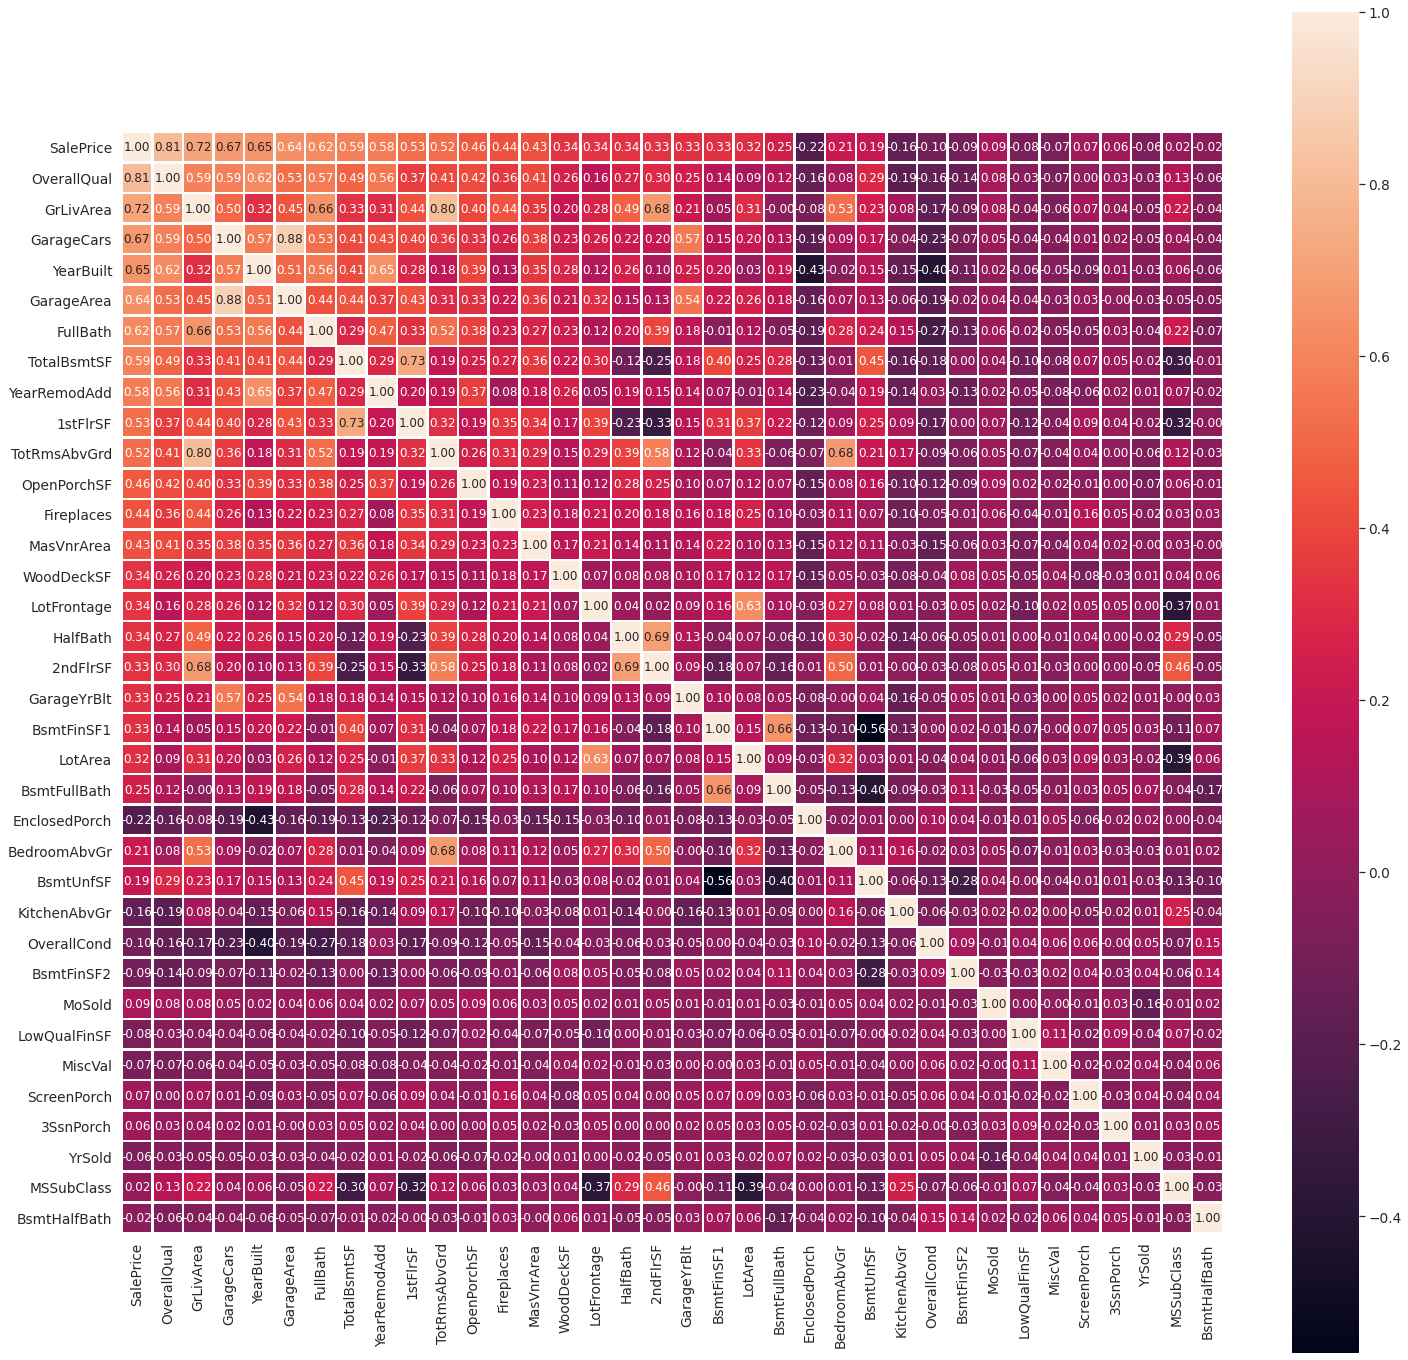

In [ ]:
# Heatmap
data = X_train.copy()[[feature for feature in num_features if feature != 'Id' and feature != 'SalePrice']].join(train_labels)
nr_feats=len(data.columns)

corr = data.corr()
corr_abs = corr.abs()
cols = corr_abs.nlargest(nr_feats, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(nr_feats/1.5, nr_feats/1.5))
sns.set(font_scale=1.25)
sns.heatmap(cm, linewidths=1.5, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Remove correrated features

In [ ]:
# Features with strong correlation to SalePrice
corr = X_train.copy().join(train_labels).corr()
corr_abs = corr.abs()

ser_corr = corr_abs.nlargest(len(X_train.columns), 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.3].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= 0.3].index)

print(ser_corr.head(30))
print("*"*30)
print("List of numerical features with r above 0.3 :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below 0.3 :")
print(cols_bel_corr_limit)

SalePrice            1.000000
OverallQual          0.805972
GrLivArea            0.715961
GarageCars           0.672394
YearBuilt            0.653020
GarageArea           0.640709
ExterQual_TA         0.621129
FullBath             0.616704
TotalBsmtSF          0.591996
YearRemodAdd         0.578232
KitchenQual_TA       0.570226
ExterQual_Gd         0.564943
Foundation_PConc     0.558824
1stFlrSF             0.525740
TotRmsAbvGrd         0.523330
BsmtQual_TA          0.512860
HeatingQC_Ex         0.495468
BsmtFinType1_GLQ     0.475682
GarageFinish_Unf     0.474451
OpenPorchSF          0.462541
FireplaceQu_NA       0.462468
KitchenQual_Gd       0.456292
BsmtQual_Ex          0.439433
Fireplaces           0.437274
MasVnrArea           0.429792
GarageType_Attchd    0.418668
GarageType_Detchd    0.416464
MasVnrType_None      0.409790
BsmtQual_Gd          0.400256
KitchenQual_Ex       0.383676
Name: SalePrice, dtype: float64
******************************
List of numerical features with r abo

Variance vs Components Plot

In [ ]:
def plot(dim_red):
  plt.plot(np.cumsum(dim_red.explained_variance_ratio_))
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance');
  plt.plot()

Getting feature set using different

In [ ]:
# Correlation 
X_train_corr = X_train[[f for f in cols_abv_corr_limit if f != "SalePrice"]]
X_test_corr = X_test[[f for f in cols_abv_corr_limit if f != "SalePrice"]]
X_train_corr.to_csv('x_train_corr_removed.csv', index=False)
X_test_corr.to_csv('x_test_corr_removed.csv', index=False)

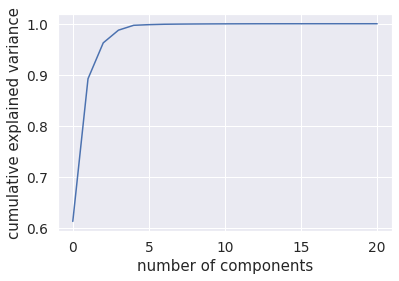

In [ ]:
# PCA
pca = PCA(n_components = 0.99998, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pd.DataFrame(X_train_pca).to_csv('x_train_pca_removed.csv', index=False)
pd.DataFrame(X_test_pca).to_csv('x_test_pca_removed.csv', index=False)
plot(pca)

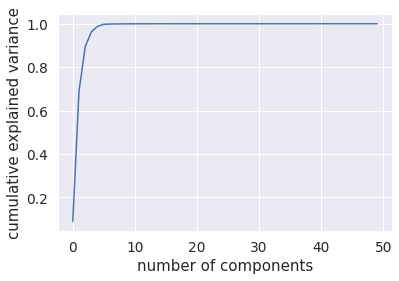

In [ ]:
# SVD
svd = TruncatedSVD(50)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)
pd.DataFrame(X_train_corr).to_csv('x_train_svd_removed.csv', index=False)
pd.DataFrame(X_test_corr).to_csv('x_test_svd_removed.csv', index=False)
plot(svd)

In [ ]:
y_train = train_labels
y_train.to_csv('y_train_removed.csv', index=False)

### Time to train

In [ ]:
def timeToTrain(model, X, y):
  startTime = time.time()
  model.fit(X,y)
  endTime = time.time()
  return endTime - startTime

### Metrics

In [ ]:
def get_metrics(X_test, y_test, y_pred):
  r2 = r2_score(y_test, y_pred)
  adj_r2 = 1 - ((1 - r2) * ((X_test.shape[0]-1) / (X_test.shape[0]-X_test.shape[1]-1)))

  print("\nMetrics")
  print("MSE =", mean_squared_error(y_test, y_pred))
  print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred)))
  print("MAE =", mean_absolute_error(y_test, y_pred))
  print("R2 Score =", r2)
  print("Adjusted R2 Score =", adj_r2)

###Save and Load Models

In [ ]:
def saveModel(model, filename):
    # save the model to disk
    pickle.dump(model, open(filename, 'wb'))

def loadModel(filename):
    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    return loaded_model

# Training Different Models

### Ridge Regression

In [ ]:
def RidgeRegression(X, y, X__test, fileName):
  ridge = Ridge(max_iter=3000, tol=0.2)
  alphas = np.logspace(-4, 4, 40)
  parameters = {'alpha': alphas}
  clf = GridSearchCV(ridge, parameters)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(clf.best_estimator_,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation Ridge Regression Score
ridgeRegressionRemoveModelCorr = RidgeRegression(X_train_corr, y_train, X_test_corr, 'prediction_remove_ridge_corr.csv')
saveModel(ridgeRegressionRemoveModelCorr, 'ridgeRegressionRemoveModelCorr')

# PCA Ridge Regression Score
ridgeRegressionRemoveModelPCA = RidgeRegression(X_train_pca, y_train, X_test_pca, 'prediction_remove_ridge_pca.csv')
saveModel(ridgeRegressionRemoveModelPCA, 'ridgeRegressionRemoveModelPCA')

# SVD Ridge Regression Score
ridgeRegressionRemoveModelSVD = RidgeRegression(X_train_svd, y_train, X_test_svd, 'prediction_remove_ridge_svd.csv')
saveModel(ridgeRegressionRemoveModelSVD, 'ridgeRegressionRemoveModelSVD')

Best Parameter:  Ridge(alpha=13.433993325988988, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, random_state=None, solver='auto', tol=0.2)
Feature Coefficients:  [ 7.11916898e-02  9.32437532e-02  1.95429733e-02  8.81927980e-04
  8.39351288e-05  1.07280144e-02  1.52304018e-02  2.84801585e-04
  1.80538036e-03 -2.74429045e-02  5.24441674e-03  1.91482351e-02
  9.13968989e-02  3.48632427e-02 -2.96266958e-02  2.18642250e-02
  4.18769751e-03 -1.74075600e-02  1.12298398e-03 -1.32622963e-02
 -5.03117152e-03  1.53191367e-02  2.45146592e-02 -8.14798061e-04
  1.20254849e-02  2.50464150e-02 -7.31020400e-03 -1.75874051e-02
  3.03521147e-02 -1.76767017e-03 -1.31629331e-02 -8.87402873e-03
 -1.12760578e-02 -1.73488560e-03  3.52454295e-02  7.26220310e-03
 -4.49159999e-02  4.49159999e-02  6.83825073e-03 -2.69130186e-02
  5.71777488e-04  1.88978792e-03  2.67588633e-02  1.01393033e-04
  1.53765056e-05  6.40836825e-04  2.38526088e-02  2.72987773e-02
  4.14740667e-04 -3.03046609e-02  

###Lasso Regression

In [ ]:
def LassoRegression(X, y, X__test, fileName):
  lasso = Lasso(max_iter= 3000, tol = 0.2)
  alphas = np.logspace(-4, 4, 40)
  parameters = {'alpha': alphas}
  clf = GridSearchCV(lasso, parameters)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(clf.best_estimator_,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation Ridge Regression Score
lassoRegressionRemoveModelCorr = LassoRegression(X_train_corr, y_train, X_test_corr, 'prediction_remove_lasso_corr.csv')
saveModel(lassoRegressionRemoveModelCorr, "lassoRegressionRemoveModelCorr")

# PCA Ridge Regression Score
lassoRegressionRemoveModelPCA = LassoRegression(X_train_pca, y_train, X_test_pca, 'prediction_remove_lasso_pca.csv')
saveModel(lassoRegressionRemoveModelPCA, 'lassoRegressionRemoveModelPCA')

# SVD Ridge Regression Score
lassoRegressionRemoveModelSVD = LassoRegression(X_train_svd, y_train, X_test_svd, 'prediction_remove_lasso_svd.csv')
saveModel(lassoRegressionRemoveModelSVD, "lassoRegressionRemoveModelSVD")

Best Parameter:  Lasso(alpha=0.007017038286703823, copy_X=True, fit_intercept=True,
      max_iter=3000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.2, warm_start=False)
Feature Coefficients:  [ 1.17931425e-01  2.53051033e-01  5.81562314e-02  2.04427546e-03
  6.04104478e-05 -0.00000000e+00  0.00000000e+00  1.62060822e-04
  1.38847793e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  6.37396126e-04 -6.74766724e-03
 -0.00000000e+00  0.00000000e+00  4.68329367e-03 -1.60608990e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.71042190e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.16416318e-04  2.74624079e-03  5.21813709e-04  2.67602407e-05
  1.95847709e-06  6.87634103e-04  

### Elastic Net Regression

In [ ]:
def ElasticNetRegression(X, y, X__test, fileName):
  elasticNet = ElasticNet(max_iter=3000, tol=0.2)
  l1_ratioArr = [] #Array of l1_ratios which decides the contribution of l1 and l2 error
  for i in range(1, 11, 1):
    l1_ratioArr.append(i * 0.1)
  
  alphas = np.logspace(-4, 4, 40)
  parameters = {'l1_ratio': l1_ratioArr, 'alpha': alphas}

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  #By default cv = 5 and refit = true
  clf = GridSearchCV(estimator = elasticNet, param_grid = parameters)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(clf.best_estimator_,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation ElasticNet Regression Score
elasticnetRegressionRemoveModelCorr = ElasticNetRegression(X_train_corr, y_train, X_test_corr, 'prediction_remove_elastic_corr.csv')
saveModel(elasticnetRegressionRemoveModelCorr, "elasticnetRegressionRemoveModelCorr")

# PCA ElasticNet Regression Score
elasticnetRegressionRemoveModelPCA = ElasticNetRegression(X_train_pca, y_train, X_test_pca, 'prediction_remove_elastic_pca.csv')
saveModel(elasticnetRegressionRemoveModelPCA, "elasticnetRegressionRemoveModelPCA")

# SVD ElasticNet Regression Score
elasticnetRegressionRemoveModelSVD = ElasticNetRegression(X_train_svd, y_train, X_test_svd, 'prediction_remove_elastic_svd.csv')
saveModel(elasticnetRegressionRemoveModelSVD, "elasticnetRegressionRemoveModelSVD")

Best Parameter:  ElasticNet(alpha=0.046415888336127774, copy_X=True, fit_intercept=True,
           l1_ratio=0.1, max_iter=3000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.2,
           warm_start=False)
Feature Coefficients:  [ 6.66874988e-02  5.55931110e-03 -0.00000000e+00  1.71543619e-03
  2.42467706e-04 -0.00000000e+00  9.12477700e-03  4.32349239e-04
  2.48435537e-03 -1.10010149e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.75176306e-03
  0.00000000e+00 -0.00000000e+00  1.47905960e-03 -2.00655719e-02
  0.00000000e+00  0.00000000e+00  3.20836711e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.73495144e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  6.10950199e-04  2.10542905e-03  0.00000000e+00  1.3485198

### Random Forest Regressor

In [ ]:
def RandomForestRegression(X, y, X__test, fileName):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # n_estimators = [600]

  # Different criterions, MSE and MAE
  criterions = ["mse", "mae"]
  # criterions = ["mse"]
  
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # max_features = ['auto']
  
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  # max_depth.append(None)
  # max_depth = [70]

  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # min_samples_split = [2]
  
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # min_samples_leaf = [1]
  
  # Method of selecting samples for training each tree
  bootstrap = [True]
  
  # Create the random grid
  random_grid = {
                'n_estimators': n_estimators,  # [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
                'criterion': criterions,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap
                 }

  rf = RandomForestRegressor()
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, random_state = 42)
  rf_random.fit(X_train, y_train)

  y_pred = rf_random.predict(X_test)

  y__pred = rf_random.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", rf_random.best_estimator_)
  # print('Feature Coefficients: ', rf_random.best_estimator_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(rf_random.best_estimator_,X_train,y_train), 'sec')
  # print('Time:', timeToTrain(rf,X_train,y_train), 'sec')
  print()

  return rf_random.best_estimator_

Correlation Random Forerst Regression Score
randomForestRemoveModelCorr = RandomForestRegression(X_train_corr, y_train, X_test_corr, 'prediction_remove_rf_corr.csv')
saveModel(randomForestRemoveModelCorr, "randomForestRemoveModelCorr")

PCA Random Forerst Regression Score
randomForestRemoveModelPCA = RandomForestRegression(X_train_pca, y_train, X_test_pca, 'prediction_remove_rf_pca.csv')
saveModel(randomForestRemoveModelPCA, "randomForestRemoveModelPCA")

# SVD Random Forerst Regression Score
randomForestRemoveModelSVD = RandomForestRegression(X_train_svd, y_train, X_test_svd, 'prediction_remove_rf_svd.csv')
saveModel(randomForestRemoveModelSVD, "randomForestRemoveModelSVD")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=40. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Parameter:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Metrics
MSE = 0.02171805702635997
RMSE = 0.14737047542286064
MAE = 0.10230245991105091
R2 Score = 0.8161739816147616
Adjusted R2 Score = 0.767542759819725
Time: 15.08849024772644 sec



## Support Vector Machine

In [ ]:
def SVMRegression(X, y, X__test, fileName):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the parameter grid
  param_grid = {'C': [0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 1, 1.2, 1.5 , 2, 5]}
  
  svr = SVR()
  clf =  GridSearchCV(estimator = SVR(), param_grid = param_grid, refit = True)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  # print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(svr,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation SVM Regression Score
print('Corr')
svmRemoveModelCorr = SVMRegression(X_train_corr, y_train, X_test_corr, 'prediction_remove_svm_corr.csv')
saveModel(svmRemoveModelCorr, "svmRemoveModelCorr")

# PCA SVM Regression Score
print('PCA')
svmRemoveModelPCA = SVMRegression(X_train_pca, y_train, X_test_pca, 'prediction_remove_svm_pca.csv')
saveModel(svmRemoveModelPCA, "svmRemoveModelPCA")

# SVD SVM Regression Score
print('SVD')
svmRemoveModelSVD = SVMRegression(X_train_svd, y_train, X_test_svd, 'prediction_remove_svm_svd.csv')
saveModel(svmRemoveModelSVD, "svmRemoveModelSVD")

Corr
Best Parameter:  SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Metrics
MSE = 0.022730983597581318
RMSE = 0.15076797935099256
MAE = 0.10669251368960356
R2 Score = 0.8076003666602456
Adjusted R2 Score = 0.7540988643411695
Time: 0.06630349159240723 sec

PCA
Best Parameter:  SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Metrics
MSE = 0.018356558695375766
RMSE = 0.1354863782650336
MAE = 0.09856537836620721
R2 Score = 0.8446263819949359
Adjusted R2 Score = 0.829659198609127
Time: 0.05369758605957031 sec

SVD
Best Parameter:  SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Metrics
MSE = 0.02404997519343715
RMSE = 0.15508054421311898
MAE = 0.10963223585884044
R2 Score = 0.7964361555590647
A

## XGBoost


In [ ]:
def XGBoost(X, y, X__test, fileName):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the parameter grid
  param_grid = {'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],  
              'gamma': [10, 5, 1, 0.1, 0.01, 0.001, 0.0001],
              'max_depth': [2,3,4,5,6,7]}  
  
  xgboostRegressor = XGBRegressor(objective = 'reg:squarederror')
  clf = GridSearchCV(estimator = xgboostRegressor, param_grid = param_grid, refit = True)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)
  
  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  # print('Feature Coefficients: ', clf_random.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(xgboostRegressor,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation SVM Regression Score
xgboostRemoveModelCorr = XGBoost(X_train_corr, y_train, X_test_corr, 'prediction_remove_xgBoost_corr.csv')
saveModel(xgboostRemoveModelCorr, "xgboostRemoveModelCorr")

# PCA SVM Regression Score
xgboostRemoveModelPCA = XGBoost(X_train_pca, y_train, X_test_pca, 'prediction_remove_xgBoost_pca.csv')
saveModel(xgboostRemoveModelPCA, "xgboostRemoveModelPCA")

# SVD SVM Regression Score
xgboostRemoveModelSVD = XGBoost(X_train_svd, y_train, X_test_svd, 'prediction_remove_xgBoost_svd.csv')
saveModel(xgboostRemoveModelSVD, "xgboostRemoveModelSVD")

Best Parameter:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Metrics
MSE = 0.015193658561972974
RMSE = 0.12326255944922195
MAE = 0.09034262852667105
R2 Score = 0.8713978071444269
Adjusted R2 Score = 0.83563676955892
Time: 0.15309524536132812 sec

Best Parameter:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
   